In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

In [ ]:
# Read in the data
df1 = pd.read_csv('abortion.csv')
df2 = pd.read_csv('climateChange.csv')
df3 = pd.read_csv('secondAmendment.csv')
df4 = pd.read_csv('trump.csv')
df5 = pd.read_csv('covid.csv')




In [ ]:
# fusionner les dataframes
df = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)

# telechargement du dataframe
df.to_csv('dataframe.csv', index=False)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _source.date_publish   49 non-null     object 
 1   _source.source_domain  50 non-null     object 
 2   _score                 50 non-null     float64
 3   Allside                50 non-null     object 
 4   _source.title          50 non-null     object 
 5   highlight.maintext     50 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.5+ KB


In [ ]:
df.head(10)

,_source.date_publish,_source.source_domain,_score,Allside,_source.title,highlight.maintext
0,NaN,vox.com,8.528465,Lean Left,"We polled 1,060 Americans about abortion. This...","Most Americans — Democrats and Republicans, me..."
1,2015-07-01 09:25:00,thedailybeast.com,8.516599,Center,Pro-Lifers Harass Women After Abortions,The **abortion** debate tends to focus on the ...
2,2017-09-18 11:13:28,thefederalist.com,8.513157,Lean Right,Why You've Never Really Seen Hollywood Portray...,Would any of us claim that we had seen an hone...
3,2016-12-13 03:42:33,edition.cnn.com,8.509182,?,Lawsuit challenges Texas fetus burial rule,Photos: History of Texas' **abortion** fight T...
4,2016-05-11 18:30:02,vox.com,8.507611,Lean Left,Abortion rates in North America and Europe are...,**Abortion** rates have plummeted in developed...
5,2020-10-15 19:58:39,nytimes.com,8.486170,Lean Left,What Happens if Roe v. Wade Is Overturned?,Impact on legal **abortion** States with trigg...
6,2015-05-13 14:24:00,vox.com,8.465325,Lean Left,10 facts that explain how America regulates ab...,The **abortion** rate has fallen steadily for ...
7,2016-05-04 11:21:45,thefederalist.com,8.463060,Lean Right,Abortion Is Not Safer Than Giving Birth,In an attempt to prove **abortion** safer than...
8,2020-02-26 08:10:00,vox.com,8.456837,Lean Left,The Supreme Court case that could end Roe v. W...,The constitutional right to an **abortion** is...
9,2018-07-05 19:51:09,nbcnews.com,8.454628,Lean Left,Abortion in the U.S.: Five key facts,**Abortion** has hit the front burner of Ameri...


In [ ]:
#import missingno as msno

# Affiche un graphique de matrice des valeurs manquantes
#msno.matrix(df)


In [ ]:
df.head()

,_source.date_publish,_source.source_domain,_score,Allside,_source.title,highlight.maintext
0,NaN,vox.com,8.528465,Lean Left,"We polled 1,060 Americans about abortion. This...","Most Americans — Democrats and Republicans, me..."
1,2015-07-01 09:25:00,thedailybeast.com,8.516599,Center,Pro-Lifers Harass Women After Abortions,The **abortion** debate tends to focus on the ...
2,2017-09-18 11:13:28,thefederalist.com,8.513157,Lean Right,Why You've Never Really Seen Hollywood Portray...,Would any of us claim that we had seen an hone...
3,2016-12-13 03:42:33,edition.cnn.com,8.509182,?,Lawsuit challenges Texas fetus burial rule,Photos: History of Texas' **abortion** fight T...
4,2016-05-11 18:30:02,vox.com,8.507611,Lean Left,Abortion rates in North America and Europe are...,**Abortion** rates have plummeted in developed...


In [ ]:
# remplacer les données contenant des ? par NaN
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

_source.date_publish     1
_source.source_domain    0
_score                   0
Allside                  6
_source.title            0
highlight.maintext       0
dtype: int64

In [ ]:
#remplacer les valeurs manquantes par la valeure la plus fréquente
df['_source.date_publish'].fillna(df['_source.date_publish'].mode()[0], inplace=True)
df['Allside'].fillna(df['Allside'].mode()[0], inplace=True)
df.isnull().sum()

_source.date_publish     0
_source.source_domain    0
_score                   0
Allside                  0
_source.title            0
highlight.maintext       0
dtype: int64

In [ ]:
df.head(10)

,_source.date_publish,_source.source_domain,_score,Allside,_source.title,highlight.maintext
0,2011-11-22 21:42:44,vox.com,8.528465,Lean Left,"We polled 1,060 Americans about abortion. This...","Most Americans — Democrats and Republicans, me..."
1,2015-07-01 09:25:00,thedailybeast.com,8.516599,Center,Pro-Lifers Harass Women After Abortions,The **abortion** debate tends to focus on the ...
2,2017-09-18 11:13:28,thefederalist.com,8.513157,Lean Right,Why You've Never Really Seen Hollywood Portray...,Would any of us claim that we had seen an hone...
3,2016-12-13 03:42:33,edition.cnn.com,8.509182,Lean Left,Lawsuit challenges Texas fetus burial rule,Photos: History of Texas' **abortion** fight T...
4,2016-05-11 18:30:02,vox.com,8.507611,Lean Left,Abortion rates in North America and Europe are...,**Abortion** rates have plummeted in developed...
5,2020-10-15 19:58:39,nytimes.com,8.486170,Lean Left,What Happens if Roe v. Wade Is Overturned?,Impact on legal **abortion** States with trigg...
6,2015-05-13 14:24:00,vox.com,8.465325,Lean Left,10 facts that explain how America regulates ab...,The **abortion** rate has fallen steadily for ...
7,2016-05-04 11:21:45,thefederalist.com,8.463060,Lean Right,Abortion Is Not Safer Than Giving Birth,In an attempt to prove **abortion** safer than...
8,2020-02-26 08:10:00,vox.com,8.456837,Lean Left,The Supreme Court case that could end Roe v. W...,The constitutional right to an **abortion** is...
9,2018-07-05 19:51:09,nbcnews.com,8.454628,Lean Left,Abortion in the U.S.: Five key facts,**Abortion** has hit the front burner of Ameri...


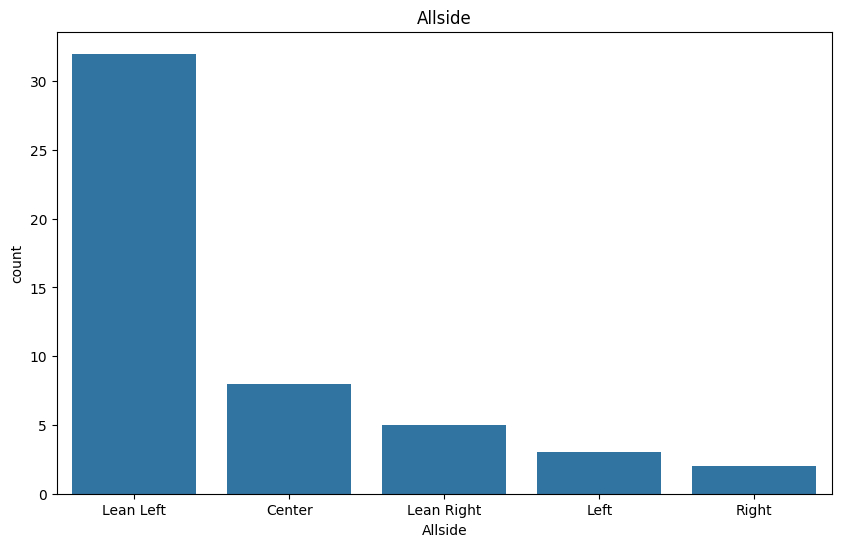

In [ ]:
# affichage des données par classement de la colonne 'Allside'
plt.figure(figsize=(10, 6))
sns.countplot(x='Allside', data=df)
plt.title('Allside')
plt.show()


In [ ]:
# Je pense qu'on doit supprimer certaines colonnes
